In [ ]:
#Libraries
import pandas as pd
from scipy import sparse
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing data
ratings=pd.read_excel("/content/drive/MyDrive/ML DATA/shivamdata.xlsx")
ratings

,productId,product_title,product_price,userId,profileName,helpfulness,score,time,summary,review
0,B000179R3I,Amazon.com:,25.00,A3Q0VJTUO4EZ56,"Jeanmarie Kabala ""JP Kabala""",1,4,1182816000,Periwinkle Dartmouth Blazer,I own the Austin Reed dartmouth blazer in eve...
1,B000GKXY34,"Nun Chuck, Novelty Nun Toss Toy",17.99,ADX8VLDUOL7BG,M. Gingras,0/0,5,1262304000,Great fun!,Got these last Christmas as a gag gift. They ...
2,B000GKXY34,"Nun Chuck, Novelty Nun Toss Toy",17.99,A3NM6P6BIWTIAE,Maria Carpenter,0/1,3,1224633600,more like funchuck,Gave this to my dad for a gag gift after dire...
3,1882931173,Its Only Art If Its Well Hung!,5.99,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a co...
4,B00002066I,ah,15.99,0,0,3/4,5,939772800,Inspiring,I hope a lot of people hear this cd. We need ...
...,...,...,...,...,...,...,...,...,...,...
16892,B000GKR7V4,Scary Stories to Tell in the Dark,64.00,0,0,4/5,4,1076457600,Scary Stories to tell in the Dark,My book is the best book ever! It is called S...
16893,B000GKR7V4,Scary Stories to Tell in the Dark,64.00,AO01UKIHKR430,Justin D Parker,4/5,5,1075680000,"After 13 years, I still can't look in the mir...","My title should say it all, but I suppose I w..."
16894,B000GKR7V4,Scary Stories to Tell in the Dark,64.00,A1NGAU6IFGZCK4,jb,4/5,5,1058832000,You Think the books are Creepy? Listen to the...,I remember reading these as a kid and then bu...
16895,B000GKR7V4,Scary Stories to Tell in the Dark,64.00,0,0,4/5,4,1032652800,Pretty Good Collection of Scary Stories For C...,"""Scary Stories to Tell in the Dark"" is a coll..."


In [ ]:
#making matrix b/w user  id and product id 
ratings_matrix=ratings.pivot_table(values='score', index='userId',columns='productId',fill_value=0)
ratings_matrix.head()

productId,7106823,7128355,20794207,26204207,60539453,60539461,60550546,60958596,70125384,70434425,70522995,71374035,71374043,72259558,75543737,80428398,130215325,130325384,130325392,134516591,136159168,140076980,141011890,151000840,152017895,152326952,155031031,192854496,195068505,195178548,195283600,195283619,195410491,198700105,205297714,205314554,205314570,205336078,226143066,226143082,...,B001GE2CDM,B001GE2CDW,B001GE2CEQ,B001GXCVWK,B001N97KMS,B001O0TMM2,B001O0TMMC,B001O0TMMM,B001O0TMO0,B001O0TMOK,B001O0TMOU,B00264U0O4,B0029T6A22,B002BNZ2XE,B002TLRG50,B002TLRG5A,B002U6R6CC,B0037FFB7W,B0037FFB86,B0037FFB9K,B0038QIYH4,B003BZR342,B003DJKZ82,B003DJKZ9G,B003Y52WTU,B004354D38,B004H9ZQ68,B004H9ZQ72,B004H9ZQ86,B004WAQDM8,B00520L1D8,B005FB8YJ8,B005NKQVJQ,B005OT2YVA,B00622HLPC,B0084BM6UO,B0087LZ3WO,B008IU1166,B008ZN8PPG,B009B0STTO
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,5,5,3.4,0,0,0,0,0,0,0,0,0,1.8,0,4.8,5,3,0,4.1,0,3.142857,0,0,5,5,4,0,5,0,0,0,0,0,...,0,1,0,0,0,5,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4.5,0,0,0,0,0.0,0,0,0,0
A00794212LQPFSVO1ZAOZ,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,5,0,0.0,0,0,0,0
A01496021AHO2YSV1VTDN,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0
A0697594EQLA004ZRJLI,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0
A08834252VBVVICHT1SE6,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0.0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0


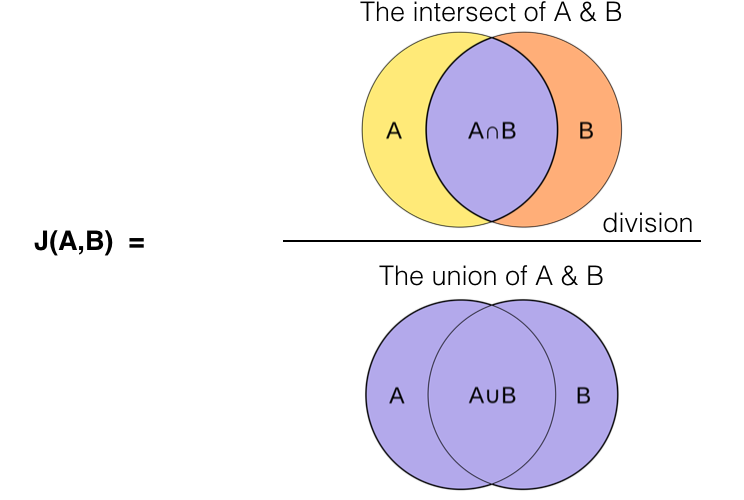

In [ ]:
#jaccard similarity using library
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(ratings_matrix.T, metric = "hamming")

jac_sim = pd.DataFrame(jac_sim, index=ratings_matrix.columns, columns=ratings_matrix.columns)

In [ ]:
#jaccard output
jac_sim

productId,7106823,7128355,20794207,26204207,60539453,60539461,60550546,60958596,70125384,70434425,70522995,71374035,71374043,72259558,75543737,80428398,130215325,130325384,130325392,134516591,136159168,140076980,141011890,151000840,152017895,152326952,155031031,192854496,195068505,195178548,195283600,195283619,195410491,198700105,205297714,205314554,205314570,205336078,226143066,226143082,...,B001GE2CDM,B001GE2CDW,B001GE2CEQ,B001GXCVWK,B001N97KMS,B001O0TMM2,B001O0TMMC,B001O0TMMM,B001O0TMO0,B001O0TMOK,B001O0TMOU,B00264U0O4,B0029T6A22,B002BNZ2XE,B002TLRG50,B002TLRG5A,B002U6R6CC,B0037FFB7W,B0037FFB86,B0037FFB9K,B0038QIYH4,B003BZR342,B003DJKZ82,B003DJKZ9G,B003Y52WTU,B004354D38,B004H9ZQ68,B004H9ZQ72,B004H9ZQ86,B004WAQDM8,B00520L1D8,B005FB8YJ8,B005NKQVJQ,B005OT2YVA,B00622HLPC,B0084BM6UO,B0087LZ3WO,B008IU1166,B008ZN8PPG,B009B0STTO
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7106823,1.000000,0.999699,0.999850,0.999850,0.999549,0.999774,0.999774,0.999699,0.999624,0.999549,0.999850,0.999774,0.999850,0.999549,0.999850,0.999850,0.999549,0.999774,0.999022,0.999699,0.999699,0.999474,0.997970,0.999774,0.999850,0.999248,0.999850,0.994886,0.999774,0.999699,0.999398,0.999398,0.999774,0.999850,0.999624,0.999624,0.999850,0.999850,0.999248,0.999699,...,0.999774,0.999474,0.999850,0.999699,0.999624,0.996842,0.999774,0.999549,0.999850,0.999323,0.999474,0.999398,0.999850,0.999549,0.999699,0.998571,0.999850,0.999850,0.999774,0.999624,0.999549,0.999699,0.999699,0.999850,0.998195,0.999774,0.999774,0.999022,0.999774,0.998797,0.988645,0.999474,0.999699,0.937359,0.999850,0.991202,0.999474,0.999474,0.998872,0.999474
7128355,0.999699,1.000000,0.999699,0.999699,0.999398,0.999624,0.999624,0.999624,0.999549,0.999474,0.999699,0.999624,0.999699,0.999398,0.999699,0.999699,0.999398,0.999624,0.998872,0.999624,0.999549,0.999398,0.997894,0.999699,0.999699,0.999173,0.999699,0.994811,0.999624,0.999549,0.999323,0.999323,0.999699,0.999699,0.999549,0.999474,0.999699,0.999699,0.999098,0.999549,...,0.999624,0.999474,0.999699,0.999549,0.999474,0.996766,0.999624,0.999474,0.999699,0.999173,0.999323,0.999248,0.999699,0.999474,0.999549,0.998421,0.999699,0.999699,0.999624,0.999474,0.999398,0.999549,0.999549,0.999699,0.998120,0.999624,0.999624,0.998872,0.999624,0.998646,0.988570,0.999323,0.999549,0.937209,0.999699,0.991051,0.999323,0.999323,0.998722,0.999323
20794207,0.999850,0.999699,1.000000,0.999850,0.999549,0.999774,0.999774,0.999699,0.999624,0.999549,0.999850,0.999774,0.999850,0.999549,0.999850,0.999850,0.999549,0.999774,0.999022,0.999699,0.999699,0.999474,0.997970,0.999774,0.999850,0.999248,0.999850,0.994886,0.999774,0.999699,0.999398,0.999398,0.999774,0.999850,0.999624,0.999624,0.999850,0.999850,0.999248,0.999699,...,0.999774,0.999474,0.999850,0.999699,0.999624,0.996842,0.999774,0.999549,0.999850,0.999323,0.999474,0.999398,0.999850,0.999549,0.999699,0.998571,0.999850,0.999850,0.999774,0.999624,0.999549,0.999699,0.999699,0.999850,0.998195,0.999774,0.999774,0.999022,0.999774,0.998797,0.988645,0.999474,0.999699,0.937359,0.999850,0.991202,0.999474,0.999474,0.998872,0.999474
26204207,0.999850,0.999699,0.999850,1.000000,0.999549,0.999774,0.999774,0.999699,0.999624,0.999549,0.999850,0.999774,0.999850,0.999549,0.999850,0.999850,0.999549,0.999774,0.999022,0.999699,0.999699,0.999474,0.997970,0.999774,0.999850,0.999248,0.999850,0.994886,0.999774,0.999699,0.999398,0.999398,0.999774,0.999850,0.999624,0.999624,0.999850,0.999850,0.999248,0.999699,...,0.999774,0.999474,0.999850,0.999699,0.999624,0.996842,0.999774,0.999549,0.999850,0.999323,0.999474,0.999398,0.999850,0.999549,0.999699,0.998571,0.999850,0.999850,0.999774,0.999624,0.999549,0.999699,0.999699,0.999850,0.998195,0.999774,0.999774,0.999022,0.999774,0.998797,0.988645,0.999474,0.999699,0.937359,0.999850,0.991202,0.999474,0.999474,0.998872,0.999474
60539453,0.999549,0.999398,0.999549,0.999549,1.000000,0.999474,0.999474,0.999398,0.999323,0.999248,0.999549,0.999474,0.999549,0.999248,0.999549

In [ ]:
#item_sim_df1=ratings_matrix.corr(method='pearson')
#item_sim_df1.head()

In [ ]:
#Helper function to find similar product with same rating
def get_sim_products(product,p_rating):
  similar_score=item_sim_df1[product]*(p_rating-2.5)#2.5 is mean of our data
  similar_score=similar_score.sort_values(ascending=False)

  return similar_score

In [ ]:
#made dummy user which have earilier gave rating to some products so see what algo suggest them
user_one=[(7106823,5),(7128355,4),(20794207,1)]
similar_products=pd.DataFrame()
for products,rating in user_one:
  similar_products=similar_products.append(get_sim_products(products,rating),ignore_index=True)
  
   
similar_products.head()
similar_products.sum().sort_values(ascending=False)

In [ ]:
def standardize(row):
   new_row=(row-row.mean())/(row.max()-row.min())
   return new_row

ratings_std=ratings_matrix.apply(standardize)
ratings_std


productId,7106823,7128355,20794207,26204207,60539453,60539461,60550546,60958596,70125384,70434425,70522995,71374035,71374043,72259558,75543737,80428398,130215325,130325384,130325392,134516591,136159168,140076980,141011890,151000840,152017895,152326952,155031031,192854496,195068505,195178548,195283600,195283619,195410491,198700105,205297714,205314554,205314570,205336078,226143066,226143082,...,B001GE2CDM,B001GE2CDW,B001GE2CEQ,B001GXCVWK,B001N97KMS,B001O0TMM2,B001O0TMMC,B001O0TMMM,B001O0TMO0,B001O0TMOK,B001O0TMOU,B00264U0O4,B0029T6A22,B002BNZ2XE,B002TLRG50,B002TLRG5A,B002U6R6CC,B0037FFB7W,B0037FFB86,B0037FFB9K,B0038QIYH4,B003BZR342,B003DJKZ82,B003DJKZ9G,B003Y52WTU,B004354D38,B004H9ZQ68,B004H9ZQ72,B004H9ZQ86,B004WAQDM8,B00520L1D8,B005FB8YJ8,B005NKQVJQ,B005OT2YVA,B00622HLPC,B0084BM6UO,B0087LZ3WO,B008IU1166,B008ZN8PPG,B009B0STTO
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.000075,0.19985,-0.000075,-0.000075,-0.000256,-0.00015,-0.00015,0.999774,0.999714,0.679708,-0.000075,-0.000135,-0.000075,-0.000376,-0.000075,-0.000075,-0.000346,-0.000105,-0.000887,0.449872,-0.000211,0.959567,0.998436,0.749868,-0.000075,0.819427,-0.000075,0.624072,-0.000105,-0.000226,0.999489,0.999489,0.99985,-0.000075,0.999699,-0.000271,-0.000075,-0.000075,-0.000541,-0.000211,...,-0.00009,0.199744,-0.000075,-0.000132,-0.000244,0.997669,-0.000135,0.999684,-0.000075,-0.000481,-0.000451,-0.000241,-0.000075,0.999714,-0.000135,-0.000993,-0.000075,-0.000075,-0.000105,-0.000301,-0.000301,-0.000211,-0.000165,-0.000075,0.398722,-0.00012,-0.0001,-0.000662,-0.000105,-0.000737,0.890562,-0.000301,-0.000211,-0.044774,-0.000075,-0.005121,-0.000391,-0.000226,-0.000466,-0.000451
A00794212LQPFSVO1ZAOZ,-0.000075,-0.00015,-0.000075,-0.000075,-0.000256,-0.00015,-0.00015,-0.000226,-0.000286,-0.000292,-0.000075,-0.000135,-0.000075,-0.000376,-0.000075,-0.000075,-0.000346,-0.000105,-0.000887,-0.000128,-0.000211,-0.000433,-0.001564,-0.000132,-0.000075,-0.000573,-0.000075,-0.004499,-0.000105,-0.000226,-0.000511,-0.000511,-0.00015,-0.000075,-0.000301,-0.000271,-0.000075,-0.000075,-0.000541,-0.000211,...,-0.00009,-0.000256,-0.000075,-0.000132,-0.000244,-0.002331,-0.000135,-0.000316,-0.000075,-0.000481,-0.000451,-0.000241,-0.000075,-0.000286,-0.000135,-0.000993,-0.000075,-0.000075,-0.000105,-0.000301,-0.000301,-0.000211,-0.000165,-0.000075,-0.001278,-0.00012,-0.0001,-0.000662,-0.000105,-0.000737,-0.009438,-0.000301,-0.000211,0.955226,-0.000075,-0.005121,-0.000391,-0.000226,-0.000466,-0.000451
A01496021AHO2YSV1VTDN,-0.000075,-0.00015,-0.000075,-0.000075,-0.000256,-0.00015,-0.00015,-0.000226,-0.000286,-0.000292,-0.000075,-0.000135,-0.000075,-0.000376,-0.000075,-0.000075,-0.000346,-0.000105,-0.000887,-0.000128,-0.000211,-0.000433,-0.001564,-0.000132,-0.000075,-0.000573,-0.000075,-0.004499,-0.000105,-0.000226,-0.000511,-0.000511,-0.00015,-0.000075,-0.000301,-0.000271,-0.000075,-0.000075,-0.000541,-0.000211,...,-0.00009,-0.000256,-0.000075,-0.000132,-0.000244,-0.002331,-0.000135,-0.000316,-0.000075,-0.000481,-0.000451,-0.000241,-0.000075,-0.000286,-0.000135,-0.000993,-0.000075,-0.000075,-0.000105,-0.000301,-0.000301,-0.000211,-0.000165,-0.000075,-0.001278,-0.00012,-0.0001,-0.000662,-0.000105,-0.000737,-0.009438,-0.000301,-0.000211,-0.044774,-0.000075,-0.005121,-0.000391,-0.000226,-0.000466,-0.000451
A0697594EQLA004ZRJLI,-0.000075,-0.00015,-0.000075,-0.000075,-0.000256,-0.00015,-0.00015,-0.000226,-0.000286,-0.000292,-0.000075,-0.000135,-0.000075,-0.000376,-0.000075,-0.000075,-0.000346,-0.000105,-0.000887,-0.000128,-0.000211,-0.000433,-0.001564,-0.000132,-0.000075,-0.000573,-0.000075,-0.004499,-0.000105,-0.000226,-0.000511,-0.000511,-0.00015,-0.000075,-0.000301,-0.000271,-0.000075,-0.000075,-0.000541,-0.000211,...,-0.00009,-0.000256,-0.000075,-0.000132,-0.000244,-0.002331,-0.000135,-0.000316,-0.000075,-0.000481,-0.000451,-0.000241,-0.000075,-0.000286,-0.000135,-0.000993,-0.000075,-0.000075,-0.000105,-0.000301,-0.000301,-0.000211,-0.000165,-0.000075,-0.

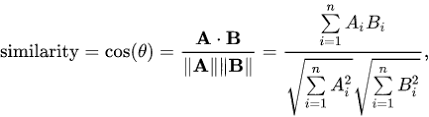

In [ ]:
#Output by cosine similarity using library
item_sim=cosine_similarity(ratings_std.T)
print(item_sim)

[[ 1.00000000e+00 -1.16049758e-04 -7.52049334e-05 ... -1.50426837e-04
  -2.36792349e-04 -1.84248357e-04]
 [-1.16049758e-04  1.00000000e+00 -1.16049758e-04 ... -2.32125703e-04
  -3.65397502e-04 -2.84316152e-04]
 [-7.52049334e-05 -1.16049758e-04  1.00000000e+00 ... -1.50426837e-04
  -2.36792349e-04 -1.84248357e-04]
 ...
 [-1.50426837e-04 -2.32125703e-04 -1.50426837e-04 ...  1.00000000e+00
  -4.73638132e-04 -3.68538291e-04]
 [-2.36792349e-04 -3.65397502e-04 -2.36792349e-04 ... -4.73638132e-04
   1.00000000e+00 -5.80129513e-04]
 [-1.84248357e-04 -2.84316152e-04 -1.84248357e-04 ... -3.68538291e-04
  -5.80129513e-04  1.00000000e+00]]


In [ ]:
#Put that output to dataframe for furhter checking
item_sim_df=pd.DataFrame(item_sim,index=ratings_matrix.columns,columns=ratings_matrix.columns)
item_sim_df

productId,7106823,7128355,20794207,26204207,60539453,60539461,60550546,60958596,70125384,70434425,70522995,71374035,71374043,72259558,75543737,80428398,130215325,130325384,130325392,134516591,136159168,140076980,141011890,151000840,152017895,152326952,155031031,192854496,195068505,195178548,195283600,195283619,195410491,198700105,205297714,205314554,205314570,205336078,226143066,226143082,...,B001GE2CDM,B001GE2CDW,B001GE2CEQ,B001GXCVWK,B001N97KMS,B001O0TMM2,B001O0TMMC,B001O0TMMM,B001O0TMO0,B001O0TMOK,B001O0TMOU,B00264U0O4,B0029T6A22,B002BNZ2XE,B002TLRG50,B002TLRG5A,B002U6R6CC,B0037FFB7W,B0037FFB86,B0037FFB9K,B0038QIYH4,B003BZR342,B003DJKZ82,B003DJKZ9G,B003Y52WTU,B004354D38,B004H9ZQ68,B004H9ZQ72,B004H9ZQ86,B004WAQDM8,B00520L1D8,B005FB8YJ8,B005NKQVJQ,B005OT2YVA,B00622HLPC,B0084BM6UO,B0087LZ3WO,B008IU1166,B008ZN8PPG,B009B0STTO
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7106823,1.000000,-0.000116,-0.000075,-0.000075,-0.000152,-0.000106,-0.000106,-0.000130,-0.000150,-0.000156,-0.000075,-0.000106,-0.000075,-0.000168,-0.000075,-0.000075,-0.000167,-0.000098,-0.000260,-0.000114,-0.000130,-0.000184,-0.000373,-0.000105,-0.000075,-0.000221,-0.000075,-0.000599,-0.000098,-0.000130,-0.000199,-0.000199,-0.000106,-0.000075,-0.000150,-0.000150,-0.000075,-0.000075,-0.000218,-0.000130,...,-0.000088,-0.000161,-0.000075,-0.000115,-0.000140,-0.000453,-0.000106,-0.000157,-0.000075,-0.000202,-0.000184,-0.000170,-0.000075,-0.000163,-0.000118,-0.000292,-0.000075,-0.000075,-0.000098,-0.000150,-0.000157,-0.000130,-0.000116,-0.000075,-0.000337,-0.000103,-0.000095,-0.000238,-0.000098,-0.000273,-0.000887,-0.000170,-0.000130,-0.002040,-0.000075,-0.000717,-0.000174,-0.000150,-0.000237,-0.000184
7128355,-0.000116,1.000000,-0.000116,-0.000116,-0.000234,-0.000164,-0.000164,0.088904,0.080665,0.055840,-0.000116,-0.000163,-0.000116,-0.000260,-0.000116,-0.000116,-0.000258,-0.000151,-0.000402,0.061572,-0.000200,0.062549,0.036242,0.092435,-0.000116,0.048372,-0.000116,0.011987,-0.000151,-0.000201,0.059596,0.059596,0.108963,-0.000116,0.076938,-0.000231,-0.000116,-0.000116,-0.000337,-0.000200,...,-0.000137,0.019197,-0.000116,-0.000177,-0.000216,0.029263,-0.000163,0.076546,-0.000116,-0.000312,-0.000284,-0.000263,-0.000116,0.087695,-0.000182,-0.000450,-0.000116,-0.000116,-0.000151,-0.000232,-0.000242,-0.000200,-0.000179,-0.000116,0.015737,-0.000159,-0.000147,-0.000367,-0.000151,-0.000421,0.011681,-0.000263,-0.000200,-0.003147,-0.000116,-0.001106,-0.000269,-0.000232,-0.000365,-0.000284
20794207,-0.000075,-0.000116,1.000000,-0.000075,-0.000152,-0.000106,-0.000106,-0.000130,-0.000150,-0.000156,-0.000075,-0.000106,-0.000075,-0.000168,-0.000075,-0.000075,-0.000167,-0.000098,-0.000260,-0.000114,-0.000130,-0.000184,-0.000373,-0.000105,-0.000075,-0.000221,-0.000075,-0.000599,-0.000098,-0.000130,-0.000199,-0.000199,-0.000106,-0.000075,-0.000150,-0.000150,-0.000075,-0.000075,-0.000218,-0.000130,...,-0.000088,-0.000161,-0.000075,-0.000115,-0.000140,-0.000453,-0.000106,-0.000157,-0.000075,-0.000202,-0.000184,-0.000170,-0.000075,-0.000163,-0.000118,-0.000292,-0.000075,-0.000075,-0.000098,-0.000150,-0.000157,-0.000130,-0.000116,-0.000075,-0.000337,-0.000103,-0.000095,-0.000238,-0.000098,-0.000273,-0.000887,-0.000170,-0.000130,-0.002040,-0.000075,-0.000717,-0.000174,-0.000150,-0.000237,-0.000184
26204207,-0.000075,-0.000116,-0.000075,1.000000,-0.000152,-0.000106,-0.000106,-0.000130,-0.000150,-0.000156,-0.000075,-0.000106,-0.000075,-0.000168,-0.000075,-0.000075,-0.000167,-0.000098,-0.000260,-0.000114,-0.000130,-0.000184,-0.000373,-0.000105,-0.000075,-0.000221,-0.000075,-0.000599,-0.000098,-0.000130,-0.000199,-0.000199,-0.000106,-0.000075,-0.000150,-0.000150,-0.000075,-0.000075,-0.000218,-0.000130,...,-0.000088,-0.000161,-0.000075,-0.000115,-0.000140,-0.000453,-0.000106,-0.000157,-0.000075,-0.000202,-0.000184,-0.000170,-0.000075,-0.000163,-0.000118,-0.000292,-0.000075,-0.000075,-0.000098,-0.000150,-0.000157,-0.000130,-0.000116,-0.000075,-0.000

In [ ]:
#randomly picked one iteam for checking suggestion
item_sim_df.index[1600]

' B000PY2MX4'

In [ ]:
#make recommendations by cosine similarity
def get_sim_products(product,p_rating):
  similar_score=item_sim_df[product]*(p_rating-2.5)
  similar_score=similar_score.sort_values(ascending=False)

  return similar_score
print(get_sim_products(item_sim_df.index[1600],4))
  

productId
 B000PY2MX4    1.500000
 B000PWS85C   -0.000820
 B000068VD5   -0.000820
1902934229    -0.000820
689850247     -0.000820
                 ...   
 B0001YXWVO   -0.014656
 B000CQ55AC   -0.015179
 B000QWA2KU   -0.017610
 B000N6DDJQ   -0.019812
 B005OT2YVA   -0.022234
Name:  B000PY2MX4, Length: 1666, dtype: float64


In [ ]:
 #check suggestion given by algo to that dummy user
 user_one=[(item_sim_df.index[6],5),(item_sim_df.index[9],4),(item_sim_df.index[8],1)]
 similar_products=pd.DataFrame()
 for products,rating in user_one:
   similar_products=similar_products.append(get_sim_products(products,rating),ignore_index=True)

   

In [ ]:
#similar products 
similar_products.head()
similar_products.sum().sort_values(ascending=False)

60550546       2.499987
70434425       1.214154
 B000PWS85C   -0.000275
929240421     -0.000275
1882931173    -0.000275
                 ...   
 B0000630OI   -0.241501
 B0000089OU   -0.241501
 B0000630OK   -0.241501
 B0000089NE   -0.241501
70125384      -1.215235
Length: 1666, dtype: float64

In [ ]:
#make recommendations bu jaccard similarity
def get_sim_products(product,p_rating):
  similar_score=jac_sim[product]*(p_rating-2.5)
  similar_score=similar_score.sort_values(ascending=False)

  return similar_score
print(get_sim_products(jac_sim.index[1600],4)) 
  

productId
 B000PY2MX4    1.500000
 B00009LW53    1.493232
 B0000A7XQR    1.493232
 B0000C3XXU    1.493232
 B0000C3XXS    1.493232
                 ...   
 B000CQ55AC    1.454655
 B0001YXWVO    1.452173
 B000QWA2KU    1.437961
 B000N6DDJQ    1.423184
 B005OT2YVA    1.399496
Name:  B000PY2MX4, Length: 1666, dtype: float64
